In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Initial Steps
---

1. Read the data
2. Plot the histogram

(0, 200)

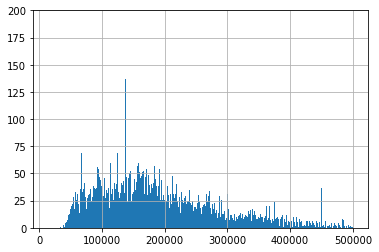

In [3]:
housing = pd.read_csv("housing.csv")
housing["median_house_value"].hist(bins=1000)
plt.ylim([0, 200])

Outlier Detection
---

There are some obvious outliers in the data (which we saw previously and above). Let's see if we can detect them using the modified z-score method. First, we need to group the data by the `median_house_value` and get the counts from any column.

In [7]:
counts = housing.groupby(['median_house_value']).count()['longitude']

Modified Z-Score
---

$$M_i = \frac{0.6745(x_i - \tilde{x})}{\text{MAD}}$$

where $\tilde{x}$ is the median and $\text{MAD}$ is the median absolute deviation.

$$\text{MAD} = \text{median}(|x_i - \tilde{x}|)$$

$M_i$ which are greater than 3.5 are considered potential outliers.

In [36]:
def outliers_modified_zscore(ys):
    median = np.median(ys)
    median_absolute_dev = np.median(np.abs(ys - median))
    modified_z_scores = 0.6745 * (ys - median) / median_absolute_dev
    return modified_z_scores

Generate the Outliers
---

1. Get the zscores and the outliers

In [46]:
zscores = outliers_modified_zscore(counts.values)
outliers = counts[zscores > 3.5]

Plot the Outliers
---

Found the tick labels trick on Stack Overflow [here](https://stackoverflow.com/a/19387765/2216847)

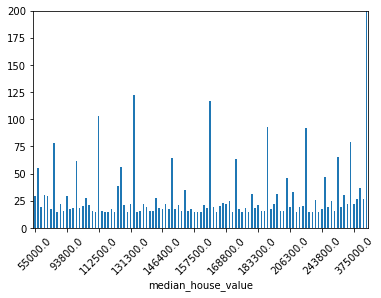

In [45]:
ax = outliers.plot(kind="bar", ylim=[0, 200], rot=45)
n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

What points to remove?
---

A decent cutoff looks like a count of $\sim 25$

In [53]:
outliers[outliers >= 25]

median_house_value
55000.0      29
67500.0      55
75000.0      30
81300.0      29
87500.0      78
93800.0      29
100000.0     62
106300.0     28
112500.0    103
118800.0     39
125000.0     56
137500.0    122
143800.0     28
150000.0     64
156300.0     35
162500.0    117
170800.0     25
175000.0     63
181300.0     31
187500.0     93
193800.0     31
200000.0     46
212500.0     33
225000.0     92
237500.0     26
250000.0     47
262500.0     25
275000.0     65
300000.0     30
350000.0     79
400000.0     27
450000.0     37
500000.0     27
500001.0    965
Name: longitude, dtype: int64

How much data do we lose?
---

In [52]:
print(counts.sum())
print(outliers[outliers >= 25].sum())

20640
2646
